In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
# Load the dataset (using sklearn's fetch_20newsgroups for demonstration)
from sklearn.datasets import fetch_20newsgroups

In [3]:
# Use only certain categories for spam and ham classification
categories = ['rec.sport.hockey', 'sci.med']  # Using these as proxies for spam and ham
data = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

In [4]:
# Create a DataFrame
df = pd.DataFrame({'text': data.data, 'label': data.target})

In [5]:
# Preprocess the text data
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

df['text'] = df['text'].apply(preprocess_text)

# Encode labels: 0 for ham, 1 for spam
# In this case, rec.sport.hockey (0) will be considered ham, sci.med (1) as spam for demonstration
df['label'] = df['label'].apply(lambda x: 1 if x == 1 else 0)

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [7]:
# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

In [8]:
# Train the model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [9]:
# Make predictions
y_pred = model.predict(X_test_tfidf)

In [10]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.9949748743718593
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       202
           1       0.99      1.00      0.99       196

    accuracy                           0.99       398
   macro avg       0.99      1.00      0.99       398
weighted avg       1.00      0.99      0.99       398



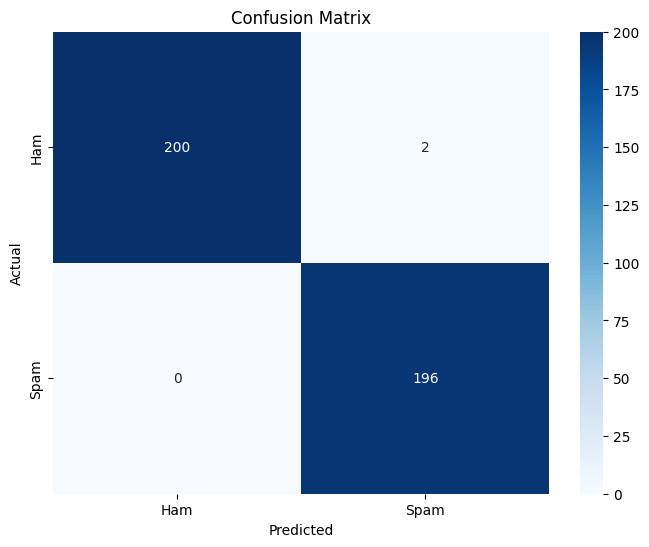

In [11]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()